In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# 데이터 적재
data_1 = pd.read_csv('s1_1_3.csv', sep=',', header=None)
data_2 = pd.read_csv('s1_3_3.csv', sep=',', header=None)
data_3 = pd.read_csv('s1_5_3.csv', sep=',', header=None)
data_4 = pd.read_csv('s1_6_3.csv', sep=',', header=None)

In [2]:
data_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,C:\Simcenter\Testxpress\ProjectData\Gamma_GS_N...,12.12.24,14:37:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,M1: Mic_near_TC : FFT(C1) Frequency[Hz],M1: Mic_near_TC : FFT(C1) [Pa](A),NaN,M2: Acc_Comp_in_X : FFT(C2) Frequency[Hz],M2: Acc_Comp_in_X : FFT(C2) [g],NaN,M3: Acc_Comp_in_Y : FFT(C3) Frequency[Hz],M3: Acc_Comp_in_Y : FFT(C3) [g],NaN,M4: Acc_Comp_in_z : FFT(C4) Frequency[Hz],M4: Acc_Comp_in_z : FFT(C4) [g],NaN,M5: Dyn_Pressure_Comp_In : FFT(C5) Frequency[Hz],M5: Dyn_Pressure_Comp_In : FFT(C5) [Pa],NaN,M6: Dyn_Pressure_Comp_Out : FFT(C6) Frequency[Hz],M6: Dyn_Pressure_Comp_Out : FFT(C6) [Pa],NaN
2,Unit,Hz,Pa,NaN,Hz,g,NaN,Hz,g,NaN,Hz,g,NaN,Hz,Pa,NaN,Hz,Pa,NaN
3,Sensor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PointId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_1 = data_1[11:1292]
data_1 = data_1.loc[:,16:18]     # iloc로 할때와 loc로 할때 포함되는 열의 차이 확인할 것 (241216)
data_1.head()


,16,17,18
11,0,78.216423,0.000000
12,6.25,-60.3278313,18.395922
13,12.5,23.5614166,9.112555
14,18.75,-22.3893738,0.050651
15,25,0.7115715,-9.772912


In [4]:
data_1.iloc[0, :]    

# 표시된 index는 무시되고 순서대로 출력되는 것을 확인 (241216)
# dtype object로 되어 있는 부분 확인 필요

16            0
17    78.216423
18          0.0
Name: 11, dtype: object

In [5]:
# data_1 = np.array(data_1, dtype=np.float)   # numpy 에러 메세지 확인 (241216)
# data_1 = np.array(data_1)
data_1 = data_1.astype('float')    # 특정열만 변경하는 경우, {'col', 'int32'} 등으로 지정할 수 있다. (261216)


Amp_data_1 = np.zeros((1281, 1))

for i in range(0, 1281):
    Amp_data_1[i, 0] = np.sqrt(data_1.iat[i, 1]**2 + data_1.iat[i, 2]**2)    # 코드 수정 -> 데이터프레임의 특정값 인덱싱 방법 iat

In [6]:
Amp_data_1

array([[78.216423  ],
       [63.07025578],
       [25.26220537],
       ...,
       [ 7.38875563],
       [ 2.86924427],
       [ 0.98888755]])

In [7]:
data_2 = data_2[11:1292]
data_2 = data_2.loc[:,16:18]     # iloc로 할때와 loc로 할때 포함되는 열의 차이 확인할 것 (241216)

data_2 = data_2.astype('float')   
Amp_data_2 = np.zeros((1281, 1))

for i in range(0, 1281):
    Amp_data_2[i, 0] = np.sqrt(data_2.iat[i, 1]**2 + data_2.iat[i, 2]**2)

In [8]:
data_3 = data_3[11:1292]
data_3 = data_3.loc[:,16:18]     # iloc로 할때와 loc로 할때 포함되는 열의 차이 확인할 것 (241216)

data_3 = data_3.astype('float')   
Amp_data_3 = np.zeros((1281, 1))

for i in range(0, 1281):
    Amp_data_3[i, 0] = np.sqrt(data_3.iat[i, 1]**2 + data_3.iat[i, 2]**2)

In [9]:
data_4 = data_4[11:1292]
data_4 = data_4.loc[:,16:18]     # iloc로 할때와 loc로 할때 포함되는 열의 차이 확인할 것 (241216)

data_4 = data_4.astype('float')   
Amp_data_4 = np.zeros((1281, 1))

for i in range(0, 1281):
    Amp_data_4[i, 0] = np.sqrt(data_4.iat[i, 1]**2 + data_4.iat[i, 2]**2)

In [10]:
Amp_data = np.zeros((1281, 8))
for i in range(0, 1281):
    Amp_data[i, 0] = data_1.iat[i, 0]          # 데이터프레임 인덱싱 방법 변경 iat (241216)
    Amp_data[i, 1] = 20*math.log10(Amp_data_1[i, 0]/1+1e-100)
    Amp_data[i, 2] = 20*math.log10(Amp_data_2[i, 0]/1+1e-100)
    Amp_data[i, 3] = 20*math.log10(Amp_data_3[i, 0]/1+1e-100)
    Amp_data[i, 4] = 20*math.log10(Amp_data_4[i, 0]/1+1e-100)

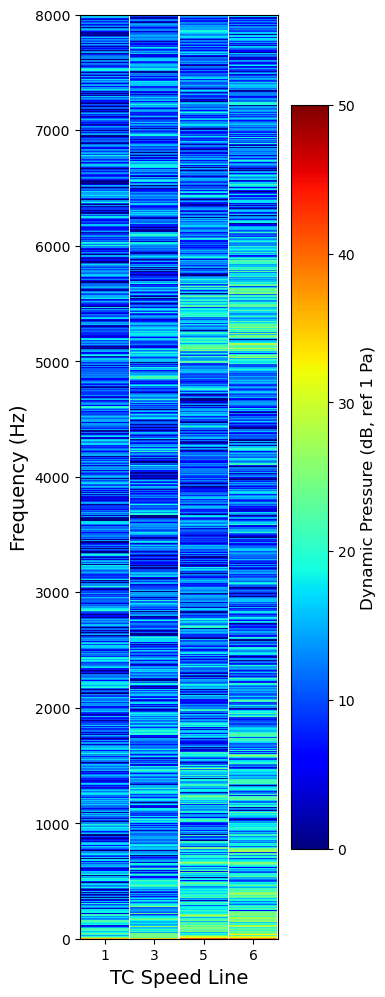

In [11]:
y = np.ones([len(Amp_data), 1])    # 임의의 정수 열을 정의
plt.subplots(figsize = (3.2, 12))

for i in range(4):
    plt.scatter(y*(i+1), Amp_data[:, 0], c = Amp_data[:, i+1], norm = plt.Normalize(vmin = 0, vmax = 50), s = 1200, marker='_', cmap='jet')

plt.ylabel('Frequency (Hz)', fontsize=14)
plt.xlabel('TC Speed Line', fontsize=14)

plt.ylim(0, 8000)
plt.xlim(0.5, 4.5)  # y축 리밋값 설정에 따라 scatter s값을 변화시켜야함

cbar = plt.colorbar()
cbar.set_label('Dynamic Pressure (dB, ref 1 Pa)', rotation=90, fontsize=12)  # Colorbar 라벨 작성

plt.xticks([1, 2, 3, 4], labels=[1, 3, 5, 6])

plt.show()



In [12]:
Amp_pd = pd.DataFrame(Amp_data)
Amp_pd.to_csv("S1_Comp_Out_Near_Surge_8k.csv")